In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from GeneralModel import GeneralModel

In [3]:
df1 = pd.read_csv("./Source_code/traceability/TECO_amb.csv", usecols=["Scaler1"])
df2 = pd.read_csv("./Source_code/traceability/TECO_eco2.csv", usecols=["Scaler1"])
xi1 = df1.values.reshape(df1.shape[0])
xi2 = df2.values.reshape(df2.shape[0])


In [4]:
df3 = pd.read_csv("./Source_code/traceability/matrix_A_K.csv", usecols=["A_1", "A_2", "A_3", "A_4", "A_5", "A_6", "A_7", "A_8"])
tmp = df3.values
matrix_A = -tmp

In [5]:
df4 = pd.read_csv("./Source_code/traceability/matrix_A_K.csv", usecols=["K_1", "K_2", "K_3", "K_4", "K_5", "K_6", "K_7", "K_8"])
matrix_K = df4.values

In [6]:
df5 = pd.read_csv("./Source_code/traceability/matrix_A_K.csv", usecols=["B"])
B = df5.values

In [7]:
init_pool_sizes = np.array([189.1422677,189.1422677,5129.556399,115.5794802,
                            742.8968061,102.9411519,5561.097498,8727.271319]).reshape([8])
# init_pool_sizes = np.array([0,0,0,0,0,0,0,0]).reshape([8])

In [8]:
df6 = pd.read_csv("./Source_code/traceability/input/Forcing_SPRUCE_400ppm_Daily.csv", usecols=["GPP"])
GPP1 = df6.values.reshape(2922)
df7 = pd.read_csv("./Source_code/traceability/input/Forcing_SPRUCE_900ppm_Daily.csv", usecols=["GPP"])
GPP2 = df7.values.reshape(2922)
date = pd.read_csv("./Source_code/traceability/input/Forcing_SPRUCE_900ppm_Daily.csv", usecols=["Date"])

In [9]:
times = np.arange(0, 2922, 1)

In [10]:
# header = ["leaf", "root", "stem"]

# gr_amb = pd.read_csv("./Source_code/traceability/Growth_rate_amb.csv", header=None)
# gr_eco2 = pd.read_csv("./Source_code/traceability/Growth_rate_eco2.csv", header=None)

# gr_amb.columns = header
# gr_eco2.columns = header

# gr_amb_mat = gr_amb.values
# gr_eco2_mat = gr_eco2.values

# temp_amb_mat = np.zeros([122640, 3])
# temp_eco2_mat = np.zeros([122640, 3])

# temp_amb_daily = np.zeros([5110, 3])
# temp_eco2_daily = np.zeros([5110, 3])

# for i in range(0, 122640):
#     for j in range(0, 3):
#         temp_amb_mat[i, j] = (gr_amb_mat[i, j] + gr_amb_mat[i+122640, j] + gr_amb_mat[i+2*122640, j] + gr_amb_mat[i+3*122640, j] + gr_amb_mat[i+4*122640, j]) / 5
#         temp_eco2_mat[i, j] = (gr_eco2_mat[i, j] + gr_eco2_mat[i+122640, j] + gr_eco2_mat[i+2*122640, j] + gr_eco2_mat[i+3*122640, j] + gr_eco2_mat[i+4*122640, j]) / 5

# for i in range(0, 5110):
#     for j in range(0, 3):
#         temp_amb_daily[i, j] = np.sum(temp_amb_mat[i*24:(i+1)*24, j])
#         temp_eco2_daily[i, j] = np.sum(temp_eco2_mat[i*24:(i+1)*24, j])
        
# dt = pd.date_range(start="20110101", end="20241227", freq="D")
# amb_daily_gr = pd.DataFrame(temp_amb_daily)
# eco2_daily_gr = pd.DataFrame(temp_eco2_daily)
# amb_daily_gr.columns = header
# eco2_daily_gr.columns = header
# amb_daily_gr.index = dt
# eco2_daily_gr.index = dt

# amb_daily_gr["fine_litter"] = 0
# amb_daily_gr["CWD"] = 0
# amb_daily_gr["Fast SOM"] = 0
# amb_daily_gr["Slow SOM"] = 0
# amb_daily_gr["Passive SOM"] = 0

# eco2_daily_gr["fine_litter"] = 0
# eco2_daily_gr["CWD"] = 0
# eco2_daily_gr["Fast SOM"] = 0
# eco2_daily_gr["Slow SOM"] = 0
# eco2_daily_gr["Passive SOM"] = 0

# amb_daily_gr = amb_daily_gr[amb_daily_gr.index < "2019-01-01"]
# eco2_daily_gr = eco2_daily_gr[eco2_daily_gr.index < "2019-01-01"]

# B1 = amb_daily_gr.values
# B2 = eco2_daily_gr.values

# amb_daily_gr['Col_sum'] = amb_daily_gr.apply(lambda x:x.sum (), axis = 1)
# eco2_daily_gr['Col_sum'] = eco2_daily_gr.apply(lambda x:x.sum (), axis = 1)

# B1_tmp = amb_daily_gr.Col_sum.values.reshape(2922,1)
# B2_tmp = amb_daily_gr.Col_sum.values.reshape(2922,1)

# B1 = B1 / B1_tmp * 0.45
# B2 = B2 / B2_tmp * 0.45

# where_are_nan1 = np.isnan(B1)
# where_are_nan2 = np.isnan(B2)
# B1[where_are_nan1] = 0
# B2[where_are_nan2] = 0

# plt.plot(B1, B2)
# plt.xlabel("ambient B")
# plt.ylabel("eCO2 B")
# plt.legend()

In [11]:
mod1 = GeneralModel(times, B, matrix_A, matrix_K, init_pool_sizes, GPP1, xi1)
res1 = mod1.get_x_df()
#mod1.write_output("./output.csv")
res1["Date"] = date["Date"]
res1['Date']=pd.to_datetime(res1['Date'],format="%Y-%m-%d")
res1.set_index("Date", inplace=True)
#res1_yearly = res1.resample('AS').sum().to_period('A')
res1_yearly = res1.resample('A').mean()
res1_yearly_values = res1_yearly.values
#res1_yearly_values / 365
tmp1 = pd.DataFrame(res1_yearly_values)
tmp1.columns = res1_yearly.columns
tmp1.index = res1_yearly.index
tmp1

,X1,X2,X3,X4,X5,X6,X7,X8,Tres,X,Xc,Xp,Tbres,xi
Date,,,,,,,,,,,,,,
2011-12-31,189.868574,189.868574,5129.598787,114.879282,742.883168,102.723775,5561.073239,8727.271081,16713.885301,20758.166479,16879.769769,-3878.396710,6656.026137,0.454823
2012-12-31,187.922338,187.922338,5128.272666,115.331541,742.877675,102.744450,5560.993806,8727.270190,16860.373104,20753.335004,18069.689469,-2683.645535,6656.026137,0.445880
2013-12-31,172.199955,172.199955,5115.759084,111.121352,742.816217,102.150883,5560.893678,8727.268989,17811.098898,20704.410112,16518.776158,-4185.633953,6656.026137,0.417296
2014-12-31,170.285080,170.285080,5108.906598,105.132159,742.628746,99.281255,5560.232722,8727.260124,18560.227482,20684.011763,18549.056733,-2134.955030,6656.026137,0.411349
2015-12-31,190.401908,190.401908,5119.709624,108.934169,742.487390,98.181073,5558.946480,8727.242508,19776.846396,20736.305062,28978.327894,8242.022833,6656.026137,0.382901
2016-12-31,220.445570,220.445570,5144.769392,123.328641,742.553672,101.841084,5557.982084,8727.228810,18137.552918,20838.594824,29857.337436,9018.742613,6656.026137,0.410987
2017-12-31,240.037014,240.037014,5169.685451,138.409969,742.868912,109.116155,5558.694238,8727.237639,19146.260187,20926.086394,31785.529830,10859.443436,6656.026137,0.384539
2018-12-31,263.644623,263.644623,5199.837823,148.848585,743.346898,115.769271,5561.303738,8727.272615,20953.776873,21023.668175,37071.039826,16047.371652,6656.026137,0.349752


In [12]:
mod2 = GeneralModel(times, B, matrix_A, matrix_K, init_pool_sizes, GPP2, xi2)
res2 = mod2.get_x_df()
res2["Date"] = date["Date"]
res2['Date']=pd.to_datetime(res2['Date'],format="%Y-%m-%d")
res2.set_index("Date", inplace=True)
#res2_yearly = res2.resample('AS').sum().to_period('A')
res2_yearly = res2.resample('A').mean()
res2_yearly_values = res2_yearly.values
#res2_yearly_values / 365
tmp2 = pd.DataFrame(res2_yearly_values)
tmp2.columns = res2_yearly.columns
tmp2.index = res2_yearly.index
tmp2

,X1,X2,X3,X4,X5,X6,X7,X8,Tres,X,Xc,Xp,Tbres,xi
Date,,,,,,,,,,,,,,
2011-12-31,189.868574,189.868574,5129.598787,114.879282,742.883168,102.723775,5561.073239,8727.271081,16713.885301,20758.166479,16879.769769,-3878.396710,6656.026137,0.454823
2012-12-31,187.922338,187.922338,5128.272666,115.331541,742.877675,102.744450,5560.993806,8727.270190,16860.373104,20753.335004,18069.689469,-2683.645535,6656.026137,0.445880
2013-12-31,172.199955,172.199955,5115.759084,111.121352,742.816217,102.150883,5560.893678,8727.268989,17811.098898,20704.410112,16518.776158,-4185.633953,6656.026137,0.417296
2014-12-31,170.285080,170.285080,5108.906598,105.132159,742.628746,99.281255,5560.232722,8727.260124,18560.227482,20684.011763,18549.056733,-2134.955030,6656.026137,0.411349
2015-12-31,190.401908,190.401908,5119.709624,108.934169,742.487390,98.181073,5558.946480,8727.242508,19776.846396,20736.305062,28978.327894,8242.022833,6656.026137,0.382901
2016-12-31,227.840135,227.840135,5150.241724,124.651835,742.568438,101.977477,5557.988339,8727.228895,18137.552918,20860.336976,38413.679702,17553.342727,6656.026137,0.410987
2017-12-31,291.645059,291.645059,5211.439365,152.848959,743.081327,111.858312,5558.984464,8727.241574,19146.260187,21088.744119,50086.316277,28997.572158,6656.026137,0.384539
2018-12-31,359.950698,359.950698,5290.658351,189.427542,744.171858,127.578268,5563.389637,8727.301012,20953.776873,21362.428063,58274.234064,36911.806001,6656.026137,0.349752


c:\users\yg336\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


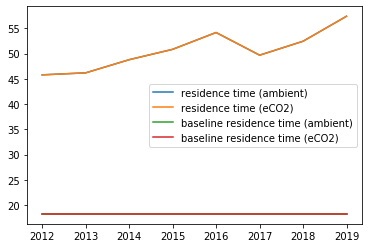

In [13]:
plt.plot(tmp1.Tres/365, label = "residence time (ambient)")
plt.plot(tmp2.Tres/365, label = "residence time (eCO2)")
plt.plot(tmp1.Tbres/365, label = "baseline residence time (ambient)")
plt.plot(tmp2.Tbres/365, label = "baseline residence time (eCO2)")
plt.legend()


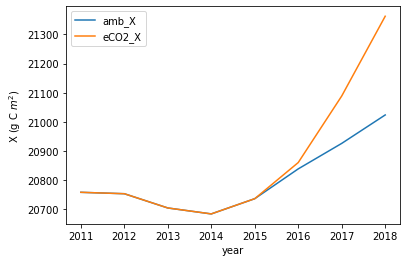

In [14]:
#plt.plot(tmp1.index, tmp1.X)
year_list = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
plt.plot(year_list, tmp1.X, label = "amb_X")
plt.plot(year_list, tmp2.X, label = "eCO2_X")
plt.xlabel("year")
plt.ylabel("X (g C $m^2$)")
plt.legend()
plt.savefig("./total_pool_size.png", dpi = 500)

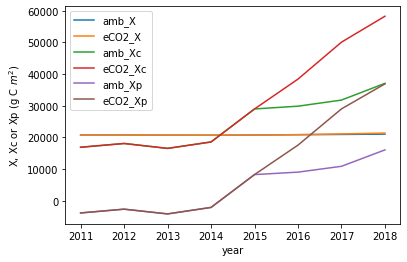

In [15]:
# Plot the X, Xc, Xp dynamics
year_list = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
plt.plot(year_list, tmp1.X, label = "amb_X")
plt.plot(year_list, tmp2.X, label = "eCO2_X")
plt.plot(year_list, tmp1.Xc, label = "amb_Xc")
plt.plot(year_list, tmp2.Xc, label = "eCO2_Xc")
plt.plot(year_list, tmp1.Xp, label = "amb_Xp")
plt.plot(year_list, tmp2.Xp, label = "eCO2_Xp")
plt.legend()
plt.xlabel("year")
plt.ylabel("X, Xc or Xp (g C $m^2$)")
plt.savefig("./X_Xc_Xp.png", dpi = 500)

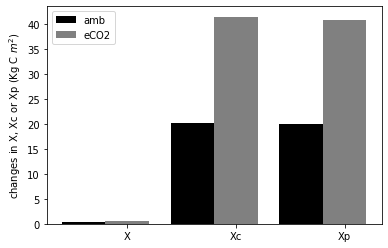

In [16]:
# Plot the changes in X, Xc and Xp
X1 = (tmp1.X[7] - tmp1.X[0]) / 1000
X2 = (tmp2.X[7] - tmp2.X[0]) / 1000
Xc1 = (tmp1.Xc[7] - tmp1.Xc[0]) / 1000
Xc2 = (tmp2.Xc[7] - tmp2.Xc[0]) / 1000
Xp1 = (tmp1.Xp[7] - tmp1.Xp[0]) / 1000
Xp2 = (tmp2.Xp[7] - tmp2.Xp[0]) / 1000

name_list = ["X", "Xc", "Xp"]
num_list = [X1, Xc1, Xp1]
num_list1 = [X2, Xc2, Xp2]
x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
 
plt.bar(x, num_list, width=width, label='amb',fc = 'black')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list1, width=width, label='eCO2',tick_label = name_list,fc = 'gray')
plt.legend()
plt.ylabel("changes in X, Xc or Xp (Kg C $m^2$)")
plt.savefig("./Changes_X_Xc_Xp.png", dpi = 500)

In [17]:
mod1_X = mod1.X
mod1_Xc = mod1.Xc
mod1_Xp = mod1.Xp

mod1_X["Date"] = date["Date"]
mod1_Xc["Date"] = date["Date"]
mod1_Xp["Date"] = date["Date"]

mod1_X["Date"] = pd.to_datetime(mod1_X['Date'],format="%Y-%m-%d")
mod1_Xc["Date"] = pd.to_datetime(mod1_Xc['Date'],format="%Y-%m-%d")
mod1_Xp["Date"] = pd.to_datetime(mod1_Xp['Date'],format="%Y-%m-%d")
mod1_X.set_index("Date", inplace=True)
mod1_Xc.set_index("Date", inplace=True)
mod1_Xp.set_index("Date", inplace=True)

mod1_X_yearly = mod1_X.resample('A').mean()
mod1_Xc_yearly = mod1_Xc.resample('A').mean()
mod1_Xp_yearly = mod1_Xp.resample('A').mean()

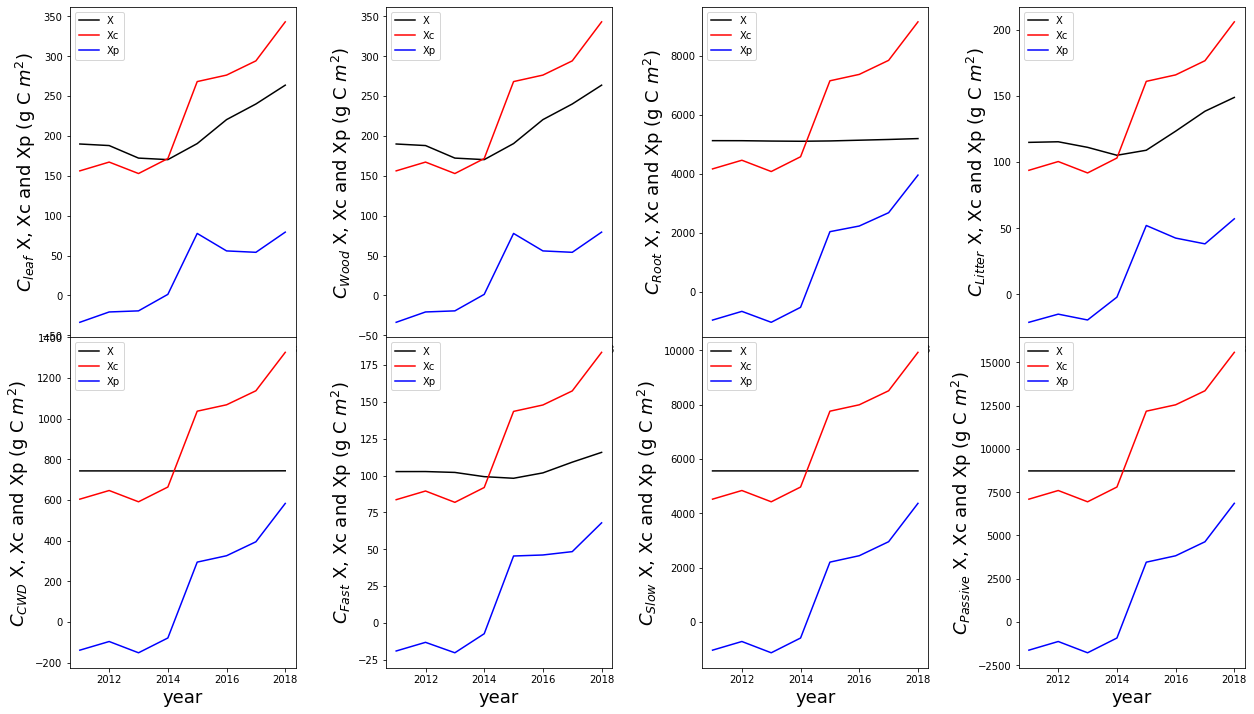

In [18]:
fig = plt.figure(2*4, figsize = (19.20, 10.80))
plt.subplots_adjust(left  = 0.1, right = 0.95, bottom = 0.05, top = 0.9, wspace =0.4, hspace =0)


year_list = [2011,2012,2013,2014,2015,2016,2017,2018]

ax = plt.subplot(2, 4, 1)
ax.plot(year_list, mod1_X_yearly[0], color = "black", label = "X")
ax.plot(year_list, mod1_Xc_yearly[0], color = "red", label = "Xc")
ax.plot(year_list, mod1_Xp_yearly[0], color = "blue", label = "Xp")
plt.ylabel("$C_{leaf}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 2)
ax.plot(year_list, mod1_X_yearly[1], color = "black", label = "X")
ax.plot(year_list, mod1_Xc_yearly[1], color = "red", label = "Xc")
ax.plot(year_list, mod1_Xp_yearly[1], color = "blue", label = "Xp")
plt.ylabel("$C_{Wood}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 3)
ax.plot(year_list, mod1_X_yearly[2], color = "black", label = "X")
ax.plot(year_list, mod1_Xc_yearly[2], color = "red", label = "Xc")
ax.plot(year_list, mod1_Xp_yearly[2], color = "blue", label = "Xp")
plt.ylabel("$C_{Root}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 4)
ax.plot(year_list, mod1_X_yearly[3], color = "black", label = "X")
ax.plot(year_list, mod1_Xc_yearly[3], color = "red", label = "Xc")
ax.plot(year_list, mod1_Xp_yearly[3], color = "blue", label = "Xp")
plt.ylabel("$C_{Litter}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 5)
ax.plot(year_list, mod1_X_yearly[4], color = "black", label = "X")
ax.plot(year_list, mod1_Xc_yearly[4], color = "red", label = "Xc")
ax.plot(year_list, mod1_Xp_yearly[4], color = "blue", label = "Xp")
plt.xlabel("year", fontsize = 18)
plt.ylabel("$C_{CWD}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 6)
ax.plot(year_list, mod1_X_yearly[5], color = "black", label = "X")
ax.plot(year_list, mod1_Xc_yearly[5], color = "red", label = "Xc")
ax.plot(year_list, mod1_Xp_yearly[5], color = "blue", label = "Xp")
plt.ylabel("$C_{Fast}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.xlabel("year", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 7)
ax.plot(year_list, mod1_X_yearly[6], color = "black", label = "X")
ax.plot(year_list, mod1_Xc_yearly[6], color = "red", label = "Xc")
ax.plot(year_list, mod1_Xp_yearly[6], color = "blue", label = "Xp")
plt.ylabel("$C_{Slow}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.xlabel("year", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 8)
ax.plot(year_list, mod1_X_yearly[7], color = "black", label = "X")
ax.plot(year_list, mod1_Xc_yearly[7], color = "red", label = "Xc")
ax.plot(year_list, mod1_Xp_yearly[7], color = "blue", label = "Xp")
plt.ylabel("$C_{Passive}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.xlabel("year", fontsize = 18)
plt.legend()

plt.savefig("./amb_pool_sizes.png", dpi = 500)

In [19]:
mod2_X = mod2.X
mod2_Xc = mod2.Xc
mod2_Xp = mod2.Xp

mod2_X["Date"] = date["Date"]
mod2_Xc["Date"] = date["Date"]
mod2_Xp["Date"] = date["Date"]

mod2_X["Date"] = pd.to_datetime(mod2_X['Date'],format="%Y-%m-%d")
mod2_Xc["Date"] = pd.to_datetime(mod2_Xc['Date'],format="%Y-%m-%d")
mod2_Xp["Date"] = pd.to_datetime(mod2_Xp['Date'],format="%Y-%m-%d")
mod2_X.set_index("Date", inplace=True)
mod2_Xc.set_index("Date", inplace=True)
mod2_Xp.set_index("Date", inplace=True)

mod2_X_yearly = mod2_X.resample('A').mean()
mod2_Xc_yearly = mod2_Xc.resample('A').mean()
mod2_Xp_yearly = mod2_Xp.resample('A').mean()

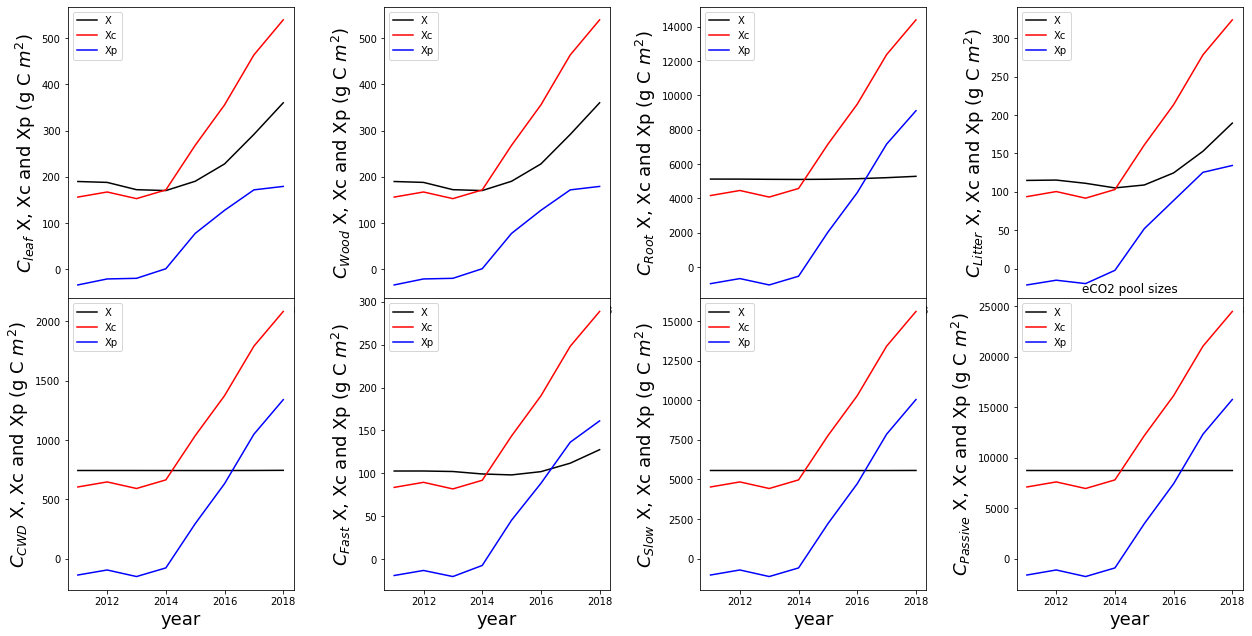

In [23]:
fig = plt.figure(2*4, figsize = (19.20, 10.80))
plt.subplots_adjust(left  = 0.1, right = 0.95, bottom = 0.05, top = 0.9, wspace =0.4, hspace =0)


year_list = [2011,2012,2013,2014,2015,2016,2017,2018]

ax = plt.subplot(2, 4, 1)
ax.plot(year_list, mod2_X_yearly[0], color = "black", label = "X")
ax.plot(year_list, mod2_Xc_yearly[0], color = "red", label = "Xc")
ax.plot(year_list, mod2_Xp_yearly[0], color = "blue", label = "Xp")
plt.ylabel("$C_{leaf}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 2)
ax.plot(year_list, mod2_X_yearly[1], color = "black", label = "X")
ax.plot(year_list, mod2_Xc_yearly[1], color = "red", label = "Xc")
ax.plot(year_list, mod2_Xp_yearly[1], color = "blue", label = "Xp")
plt.ylabel("$C_{Wood}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 3)
ax.plot(year_list, mod2_X_yearly[2], color = "black", label = "X")
ax.plot(year_list, mod2_Xc_yearly[2], color = "red", label = "Xc")
ax.plot(year_list, mod2_Xp_yearly[2], color = "blue", label = "Xp")
plt.ylabel("$C_{Root}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 4)
ax.plot(year_list, mod2_X_yearly[3], color = "black", label = "X")
ax.plot(year_list, mod2_Xc_yearly[3], color = "red", label = "Xc")
ax.plot(year_list, mod2_Xp_yearly[3], color = "blue", label = "Xp")
plt.ylabel("$C_{Litter}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 5)
ax.plot(year_list, mod2_X_yearly[4], color = "black", label = "X")
ax.plot(year_list, mod2_Xc_yearly[4], color = "red", label = "Xc")
ax.plot(year_list, mod2_Xp_yearly[4], color = "blue", label = "Xp")
plt.xlabel("year", fontsize = 18)
plt.ylabel("$C_{CWD}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 6)
ax.plot(year_list, mod2_X_yearly[5], color = "black", label = "X")
ax.plot(year_list, mod2_Xc_yearly[5], color = "red", label = "Xc")
ax.plot(year_list, mod2_Xp_yearly[5], color = "blue", label = "Xp")
plt.ylabel("$C_{Fast}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.xlabel("year", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 7)
ax.plot(year_list, mod2_X_yearly[6], color = "black", label = "X")
ax.plot(year_list, mod2_Xc_yearly[6], color = "red", label = "Xc")
ax.plot(year_list, mod2_Xp_yearly[6], color = "blue", label = "Xp")
plt.ylabel("$C_{Slow}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.xlabel("year", fontsize = 18)
plt.legend()

ax = plt.subplot(2, 4, 8)
ax.plot(year_list, mod2_X_yearly[7], color = "black", label = "X")
ax.plot(year_list, mod2_Xc_yearly[7], color = "red", label = "Xc")
ax.plot(year_list, mod2_Xp_yearly[7], color = "blue", label = "Xp")
plt.ylabel("$C_{Passive}$ X, Xc and Xp (g C $m^2$)", fontsize = 18)
plt.xlabel("year", fontsize = 18)
plt.title("eCO2 pool sizes")
plt.legend()
plt.savefig("./eco2_pool_sizes.png", dpi = 500)